# Problem Set 2

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of surveys conducted in 1998
 * "Wave 2" of surveys conducted in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected|
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

In [1]:
import warnings
warnings.filterwarnings("ignore") 

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean, standard error, and the values at the 5th and 95th percentiles) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

*Note:* For this and subsequent problems, you will need to be careful in how you deal with missing (NULL) values. You should not blindly drop rows and columns where any data field is missing.  For instance, in calculating the average `hohwag`, you should average the `hohwag` values from all households that report a value (even if the household does not have a recorded `age` value, for example). 

In [2]:
# your code here
import pandas as pd

path_progresa_data ="/Users/larsleopold/Desktop/info251/applied-machine-learning/Problem-sets/ps2/progresa_sample.csv"
progresa_data = pd.read_csv(path_progresa_data)
progresa_df = pd.DataFrame(progresa_data)

#changing the variables to be 1 if poor and 1 if treatment, i assume basal means they get treatment 
progresa_df['poor'] = progresa_df['poor'].apply(lambda x: 1 if x == 'pobre' else 0)
progresa_df['progresa'] = progresa_df["progresa"].apply(lambda x: 1 if x == 'basal' else 0)
                                               
demographic_variables_df = progresa_df.drop(columns=['year', 'folnum', 'village']) 
statistics_list = []

for col in demographic_variables_df.columns:
    mean = demographic_variables_df[col].mean()
    standard_error = demographic_variables_df[col].std()
    pr_5th = demographic_variables_df[col].quantile(0.05)
    pr_9th = demographic_variables_df[col].quantile(0.95)
    
    statistics_list.append({
        'Variable' : col,
        'Mean' : mean,
        'Standard error': standard_error,
        '5th precentile': pr_5th,
        '95th precentile' : pr_9th

    })


stats_table = pd.DataFrame(statistics_list)
stats_table = stats_table.round(3)
stats_table = stats_table.sort_values(by = "Variable")
display(stats_table)


,Variable,Mean,Standard error,5th precentile,95th precentile
15,age,11.366,3.168,7.000,16.000
7,dist_cap,147.674,76.063,43.886,289.016
2,dist_sec,2.419,2.234,0.000,5.875
5,fam_n,7.216,2.353,4.000,11.000
4,grc,3.964,2.499,0.000,8.000
16,grc97,3.705,2.572,0.000,8.000
14,hohage,44.437,11.620,29.000,66.000
10,hohedu,2.768,2.656,0.000,7.000
13,hohsex,0.925,0.263,0.000,1.000
11,hohwag,586.985,788.134,0.000,1440.000


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages?  Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):


| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|

 *Hint:* Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 from poor households (i.e., poor=='pobre').


In [3]:
# your code here
from scipy import stats

data_97_and_poor = progresa_df[(progresa_df["poor"] == 1) 
                                            & (progresa_df["year"] == 97)]

data_97_and_poor = data_97_and_poor.drop(columns=["grc97", "year", "poor", "sc97"])
T_group = data_97_and_poor[data_97_and_poor["progresa"] == 1]
C_group = data_97_and_poor[data_97_and_poor["progresa"] == 0]

characteristics_list = []

def avarage_value(df1, df2, list):
    for col in df1:
        mean_value_df1 = df1[col].mean()
        mean_value_df2 = df2[col].mean()
        t_stat, p_value = stats.ttest_ind(df1[col].dropna(), df2[col].dropna())
        list.append({
            'Variable Name' : col,
            "Average value (Treatmen villages)" : mean_value_df1,
            "Average value (Control villages)" : mean_value_df2,
            "Difference (Treat - Control)" : (mean_value_df1 - mean_value_df2) ,
            "p-value" : p_value,
        })
    return list

charactherstics = avarage_value(T_group, C_group, characteristics_list)
charactherstics_table = pd.DataFrame(charactherstics)

charactherstics_table = charactherstics_table.sort_values(by = "Variable Name")
charactherstics_table = charactherstics_table.round(4)

display(charactherstics_table)


,Variable Name,Average value (Treatmen villages),Average value (Control villages),Difference (Treat - Control),p-value
14,age,10.7170,10.7420,-0.0250,0.4786
7,dist_cap,150.8291,153.7697,-2.9407,0.0008
2,dist_sec,2.4531,2.5077,-0.0545,0.0357
5,fam_n,7.2813,7.3025,-0.0211,0.4271
16,folnum,19321.1682,19272.8443,48.3239,0.7031
4,grc,3.5316,3.5430,-0.0115,0.6890
13,hohage,43.6488,44.2769,-0.6281,0.0000
9,hohedu,2.6631,2.5903,0.0728,0.0111
12,hohsex,0.9247,0.9229,0.0017,0.5712
10,hohwag,544.3395,573.1636,-28.8240,0.0003


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages at baseline? 
* B: Why does it matter if there are differences at baseline? 
* C: What does this imply about how to measure the impact of the treatment?

#### your interperation here

A. There are some variables that have statistifall significant differences between treatment and control, if we have the typical threshold for p-value at 0.05(e.g., distance to the capital, age of head of household, years of schooling of head of household,etc) But many of the other variables dont have statistically significant differeneces. 

B. If the treatment and control groups differ systematically before the intervention, any simple comparison of outcomes after the program might effect the effect of the program with pre‐existing differences. In other words, we could be measuring the impact of already unequal starting points rather than the effect of the treatment itself. This is also important when one makes the key ideintifyig assumtion. 

C. Because some variables differ between treatment and control at the outset, we may need an evaluation strategy that accounts for these baseline imbalances.


### 1.4 Graphical exploration

Visualize the distribution of village enrollment rates among poor households in treated villages, before and after treatment.

Specifically, for each treated village:

- First, calculate the average rate of enrollment of poor households in 1997.
- Then, compute the average rate of enrollment of poor households in 1998.
- Create a graph showing the distribution of these average enrollment rates (one histogram for 1997 and one histogram for 1998). On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). 
- Ensure that your graph is well formatted / publication quality -- add a title, x-axis labels, a legend, and any other elements as necessary.

Then, answer the following questions:
- Does there appear to be a difference between the average enrolment rates in 1997 and 1998? Is this difference statistically significant?

Now, repeat the process, and generate a second set of graphs comparing the distributions for non-poor households, before and after treatment.

- Does there appear to be a difference between the average enrolment rates in 1997 and 1998? Is this difference statistically significant?


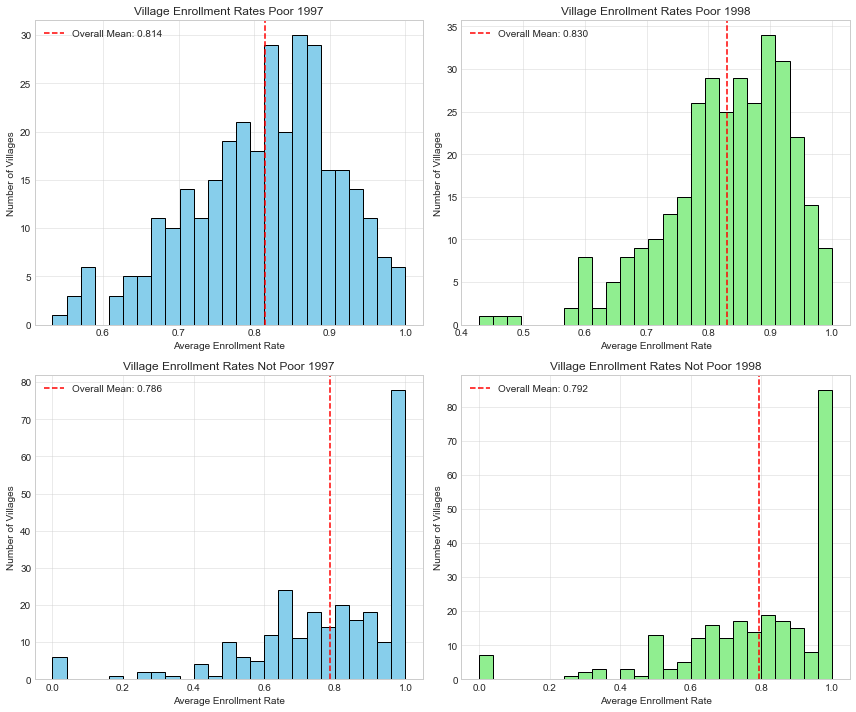

In [15]:
# your code here
import matplotlib.pyplot as plt

treated_poor_1997 = progresa_df[(progresa_df['progresa'] == 1) 
                                & (progresa_df['poor'] == 1) 
                                & (progresa_df['year'] == 97)]
treated_poor_1998 = progresa_df[(progresa_df['progresa'] == 1) 
                                & (progresa_df['poor'] == 1) 
                                & (progresa_df['year'] == 98)]

village_enroll_rate_1997 = treated_poor_1997.groupby('village')['sc'].mean().reset_index()
village_enroll_rate_1998 = treated_poor_1998.groupby('village')['sc'].mean().reset_index()
overall_mean_1997 = village_enroll_rate_1997['sc'].mean()
overall_mean_1998 = village_enroll_rate_1998['sc'].mean()

treated_not_poor_1997 = progresa_df[(progresa_df['progresa'] == 1) 
                                & (progresa_df['poor'] == 0) 
                                & (progresa_df['year'] == 97)]
treated_not_poor_1998 = progresa_df[(progresa_df['progresa'] == 1) 
                                & (progresa_df['poor'] == 0) 
                                & (progresa_df['year'] == 98)]
village_enroll_rate_1997_not_poor = treated_not_poor_1997.groupby('village')['sc'].mean().reset_index()
village_enroll_rate_1998_not_poor = treated_not_poor_1998.groupby('village')['sc'].mean().reset_index()
overall_mean_1997_not_poor = village_enroll_rate_1997_not_poor['sc'].mean()
overall_mean_1998_not_poor = village_enroll_rate_1998_not_poor['sc'].mean()

plt.figure(figsize=(12, 10))
plt.style.use('seaborn-whitegrid')

#Poor 1997
plt.subplot(2, 2, 1)
plt.hist(village_enroll_rate_1997['sc'].dropna(), bins=25, color='skyblue', edgecolor='black')
plt.axvline(overall_mean_1997, color='red', linestyle='dashed', linewidth=1.5, 
    label=f'Overall Mean: {overall_mean_1997:.3f}')
plt.title('Village Enrollment Rates Poor 1997')
plt.xlabel('Average Enrollment Rate')
plt.ylabel('Number of Villages')
plt.grid(alpha=0.5)
plt.legend()

#Poor 1998
plt.subplot(2, 2, 2)
plt.hist(village_enroll_rate_1998['sc'].dropna(), bins=25, color='lightgreen', edgecolor='black')
plt.axvline(overall_mean_1998, color='red', linestyle='dashed', linewidth=1.5, 
    label=f'Overall Mean: {overall_mean_1998:.3f}')
plt.title('Village Enrollment Rates Poor 1998')
plt.xlabel('Average Enrollment Rate')
plt.ylabel('Number of Villages')
plt.grid(alpha=0.5)
plt.legend()

#Not Poor 1997
plt.subplot(2, 2, 3)
plt.hist(village_enroll_rate_1997_not_poor['sc'].dropna(), bins=25, color='skyblue', edgecolor='black')
plt.axvline(overall_mean_1997_not_poor, color='red', linestyle='dashed', linewidth=1.5, 
    label=f'Overall Mean: {overall_mean_1997_not_poor:.3f}')
plt.title('Village Enrollment Rates Not Poor 1997')
plt.xlabel('Average Enrollment Rate')
plt.ylabel('Number of Villages')
plt.grid(alpha=0.5)
plt.legend()

#Not Poor 1998
plt.subplot(2, 2, 4)
plt.hist(village_enroll_rate_1998_not_poor['sc'].dropna(), bins=25, color='lightgreen', edgecolor='black')
plt.axvline(overall_mean_1998_not_poor, color='red', linestyle='dashed', linewidth=1.5, 
    label=f'Overall Mean: {overall_mean_1998_not_poor:.3f}')
plt.title('Village Enrollment Rates Not Poor 1998')
plt.xlabel('Average Enrollment Rate')
plt.ylabel('Number of Villages')
plt.grid(alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

**Answering the question to 1.4:**

 - There appears to be a difference between the average enrolment rates in 1997 and 1998, even though the change in overall mean is not that significant, one can se that the distribution is more centered around higher enrollment after the treatment. I am assuming that to answer the question: "Is this difference statistically significant?" we are going to use only the plots here and not do a ttest. Based on the plots, we could say that this increas is of statistical significans as the distribution is centered around higher enrollment. But to be more certian one should do a t-test. 

 - Here there is also an increase in the overall mean of enrolment after treatment, but compared to the poor pre vs post figures, the difference is more subtle. There is a slight increase, but based on the histogram, there does not seem like there is a significat increase distribution more centered around higher enrollment, suggesting not statistical significans in the slight increase in mean. 

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on school enrollment rates among the poor (those with poor=='pobre'), since only the poor were eligible to receive PROGRESA assistance, and since a primary objective of the program was to increase school enrollment.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [5]:
# your code here
from scipy.stats import ttest_ind
control_poor_1998 = progresa_df[(progresa_df["poor"] == 1) & (progresa_df["progresa"] == 0) & (progresa_df["year"] == 98)]

treated_enroll_rate_1998 = treated_poor_1998["sc"].mean()
control_enroll_rate_1998 = control_poor_1998["sc"].mean()

diff = treated_enroll_rate_1998 - control_enroll_rate_1998
t_stat, p_value = ttest_ind(treated_poor_1998["sc"].dropna(), control_poor_1998["sc"].dropna())

print(f"Difference between treatment and control group: {diff}")
print(f"t-statistic: {t_stat}, p-value: {p_value}")



Difference between treatment and control group: 0.0388421646651228
t-statistic: 8.358720567418374, p-value: 6.636344447523235e-17


**Answering question in 2.1**

Based on the t-test the difference is statistically significant, with very low p-value and the very high t-stat, indicating that the difference we are seeing is higly significant. Much larger then what we would espect due to randome variation in the two groups. The stats indicates that we should reject the null-hypothesis of the treatment having no effect. 

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that a person with no technical background could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [6]:
# your code here
import statsmodels.api as sm
import statsmodels.formula.api as smf

progresa_df_98_poor = progresa_df[(progresa_df["year"] == 98) & (progresa_df["poor"] == 1)]
model = smf.ols(formula='sc ~ progresa', data=progresa_df_98_poor).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           6.64e-17
Time:                        09:05:48   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.0

**Answer to 2.2**
- Based on the model, did the progresa program increase the likelihood of a poor child enrolling by about 3.9 percentage points. This means that if 80 out of 100 children were enrolled before the program, around 84 out of 100 children were enrolled after the program. 

- The model is very similar to my t-test from erlier. The treatment effect coeficient, is practically the same value we got from the simple differene and so is the t-stat and the p-value. Both the regression and the t-test gives therefor the same estimated effect of the progresa program. 

- yes we can reject the null hypothesis based of the low p-value and the high t-stat done form this test and conclude that Progresa had a statistically signinificant positive effect on school enrollment for poor childern. There might be other factors or hidden variables though that can have an effect on this outcome. 

- The counterfactual assumtion is that without the treatment the school enrollment rates for poor childern in the treatment and control groups would have been the same. 

### 2.3 Multiple Regression

Re-run the above regression, but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
* Interpet the coefficient associated with the `dist_sec` variable. Is this evidence that the household's distance from a secondary school has a *causal* impact on educational attainment?

In [7]:
# your code here
progresa_df_98_poor = progresa_df[(progresa_df["year"] == 98) & (progresa_df["poor"] == 1)]
model = smf.ols(formula='sc ~ progresa + age + dist_sec + sex + hohedu + indig + welfare_index', data=progresa_df_98_poor).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1419.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        09:05:48   Log-Likelihood:                -7639.4
No. Observations:               27267   AIC:                         1.529e+04
Df Residuals:                   27259   BIC:                         1.536e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.5025      0.014    105.342

**Answer to 2.3**
Disclaimer, there were answers vere already in the notebook for 2.3 and 2.4 when i downloaded

- The control variables had value of 0.003 decreasing effect on the estimated coefficient for the treatment. 

- There was a very little effect on the standard error.

- The control variables slightly reduces the estimated effect of progresa on school enrollment, but the effect still remains high. This means that other factors you might without controlling for other variables get an over estimate of the treatment effect. The control variables help us isolate the true causal effect of progresa by reducing bias due to confounding factors.

- While the negative relationship of -0.0117 is statistically significant, it does not necessarily prove that there is causality. Other factors like household income, availability of transportation, school quality might influence both dist_sec and school enrollment. These factors might also drive distance and the enrollment. 

### 2.4 Multiple Regression Revisited

For the same set of control variables that you used in 2.3, carry out the following alternative estimation procedure. 

* First, regress the 1998 enrollment of the poor on the control variables, **without including the treatment assignment.** 
* Second, use this model to obtain predicted values of the 1998 enrollment for each child in the sample used to estimate the model in step 1. 
* Third, compute a new value for each child, which is the difference between the actual 1998 enrollment and the predicted enrollment value from step 2. 
* Finally, regress the difference from step 3 on treatment assignment.

Compare the point estimate and the standard error on treatment assignment that you obtained in step 4 to their analogues in 2.3. Explain the results.

In [8]:
# your code here
model = smf.ols(formula='sc ~ age + dist_sec + sex + hohedu + indig + welfare_index', data=progresa_df_98_poor).fit()

progresa_df_98_poor['predicted_enrollment'] = model.predict(progresa_df_98_poor)
progresa_df_98_poor['enrollment_diff'] = progresa_df_98_poor['sc'] - progresa_df_98_poor['predicted_enrollment']
#display(progresa_df_98_poor[['sc', 'predicted_enrollment', 'enrollment_diff']].head())

model_treatment_effect = smf.ols(formula='enrollment_diff ~ progresa', data=progresa_df_98_poor).fit()
print(model_treatment_effect.summary())

                            OLS Regression Results                            
Dep. Variable:        enrollment_diff   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     77.36
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           1.50e-18
Time:                        09:05:48   Log-Likelihood:                -7639.4
No. Observations:               27267   AIC:                         1.528e+04
Df Residuals:                   27265   BIC:                         1.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0219      0.003     -6.934      0.0

**Answer 2.4**

The progresa coefficient and standard errors that vere optained predicting enrollment and using the controlvariables first are very similar as what i got in task 2.3. In this two-step approach, the second regression estimates the relationship between treatment assignment and the residual variation in the outcome that is not explained by controls. This similarity in results suggests that progresa’s effect on enrollment stays consistent, even when accounting for other factors, meaning the program had a reliable impact.

### 2.5 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. 

Display your results in a 2x2 table where the rows are Control/Treatment and the columns are 1997/1998. 

* What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [9]:
# your code here

treated_enroll_rate_1998 # from erlier in the notebook
treated_enroll_rate_1997 = treated_poor_1997["sc"].mean()

control_enroll_rate_1998 # from erlier in the notebook

control_enroll_1997 = progresa_df[(progresa_df["poor"] == 1) & (progresa_df["progresa"] == 0) & (progresa_df["year"] == 97)]
control_enroll_rate_1997 = control_enroll_1997["sc"].mean()

diff_98_97_treated = treated_enroll_rate_1998 - treated_enroll_rate_1997
diff_98_97_control = control_enroll_rate_1998 - control_enroll_rate_1997

results = {
    'T/C' : ['Control', 'Treatment'],
    '1997' : [control_enroll_rate_1997, treated_enroll_rate_1997],
    '1998' : [control_enroll_rate_1998, treated_enroll_rate_1998]
}

results_table = pd.DataFrame(results)
results_table.set_index('T/C', inplace = True)

display(results_table)

diff_in_diff = diff_98_97_treated - diff_98_97_control

print(f"Difference-in-Difference Estimate: {diff_in_diff}")



,1997,1998
T/C,,
Control,0.815186,0.807637
Treatment,0.822697,0.846479


Difference-in-Difference Estimate: 0.031331280319323085


**Answer to 2.5**

- The difference-in-difference result estimate of inpact is 0.031. This is a bit lower then the simple difference i got earlier. This suggests that part of the observed difference in the simple difference approach was not solely due to Progresa, but also influenced by pre-existing differences between the treatment and control groups in 1997  

- The counterfactual underlying this estimate is that the trends move the same between the control group and the treatment group. In other words, in the absence of the progresa program, the control and treatment groups would have followed the same trend in enrollment over time.

### 2.6 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences, for the poor households. Do this (i) first without including any control variables; and then (ii) do it a second time including at least 5 control variables. 

* What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the `progresa` coefficient between (i) and (ii)?
* How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?
* What is the counterfactual assumption underlying regression (ii)? 

In [10]:
## your code here
# Y = a + b*T + g * P + lmda(P * T)
progresa_df_poor = progresa_df[(progresa_df["year"].isin([97, 98])) & (progresa_df["poor"] == 1)]
model_no_controls = smf.ols(formula='sc ~ (progresa) * (year == 98)', 
                            data=progresa_df_poor).fit()

print(model_no_controls.summary())

with_controls = 'sc ~ (progresa  * (year == 98)) + age + dist_sec + sex + hohedu + indig + welfare_index'
model_with_controls = smf.ols(formula=with_controls, data=progresa_df_poor).fit()


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.31
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           2.76e-18
Time:                        09:05:49   Log-Likelihood:                -26242.
No. Observations:               58372   AIC:                         5.249e+04
Df Residuals:                   58368   BIC:                         5.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [11]:
print(model_with_controls.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     2488.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):               0.00
Time:                        09:05:49   Log-Likelihood:                -16656.
No. Observations:               58013   AIC:                         3.333e+04
Df Residuals:                   58003   BIC:                         3.342e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

**Answers 2.6**

- The estimated impact of progresa based of the DiD regression is that progresa had 3.13 percentage points positive effect on enrollment. This i get from the coefficient of the lmda term from the equation comented in the coding part of this task (lmda * (progresa) * (year == 98)), this term is the causal estimate of the treatment effect. The standard error of 0.006 is low, suggesting the estimate is precice. And low p-value and high t-stat suggest statistical significans. 

- There is as earlier a slight negative change in estimated impact when i add controlvariables. The impact gets slight lower from 3.13- to 3.09 precentage points for the causal estimate of the treatment effect, which is very little, ubt a slight bigger change on the progresa coefficient that goes from 0.75 precentage points to 0.44 precentage points. I think the explenation to these changes are the same as before, where there are other variables that have an effect on the enrollment that were not taken in to acount in the model. But as the p-value is quite high, over 0.05 in both cases, means that we cant reject the nullhypothesis and that before Progresa was introduced (in 1997), there was no significant difference in enrollment between treatment and control groups, which supports the parallel trends assumption.  

- The regression-based DiD estimate confirms the manually calculated value, validating that progresa increased school enrollment by about 3.13 percentage points. Adding the control variables and the difference that might exist here are the same as the answer above. 

- The counter factual is that in the absence of progresa, the treatment and control groups would have followed the same trend in school enrollment over time, even after accounting for differences in individual characteristics ( control variables) 

### 2.7 Heterogeneous Treatment Effects

Thus far, we have been calculating the average treatment effect -- implicitly assuming that the impacts of progresa are homogeneous (i.e similar for everyone in the treatment group).

However, treatment effects might vary by demographics, socio-economic status, or other covariates. In this exercise, we'll think a little more carefully about such variation in treatment effects, the aim being to arrive at a more nuanced understanding of who benefits most from progresa. (More formally, we are now thinking of *conditional* average treatment effects -- a concept that you will revisit towards the end of the semester).

Repeat your analysis in 2.5 / 2.6, instead focusing on whether the impacts of Progresa on school enrolment differ by gender.

1. Begin by estimating the average treatment effects of the program for male children in poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among male children in poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among male children in poor households in control villages.
    - Report your results in a 2 X 2 table where the rows are Control / Treatment, and the columns are 1997 / 1998.
    - Report your estimate of the causal impact of progresa on school enrolment for male children.

2. Repeat the process for female children in poor households using data from 1997 and 1998.
    - Report the results in a 2 X 2 table where the rows are Control / Treatment, and the columns are 1997 / 1998.
    - Report your estimate of the causal impact of progresa on school enrolment for male children.

3. Do the effects of Progresa differ by gender?
    - Begin by examining manually examining the differences in the causal impact of progresa on school enrolment for male and female children (from Steps 1 and 2 above ).  
    - Then, extend the double difference regression you ran in 2.6 (without including any control variables) to directly estimate the differential impact. (Hint: the double difference / diff-in-diff regression you have seen in class and lab sessions allow you to compare two groups (treated and control) across two time periods (pre and post). Now, within this setup, you have an additional comparison to make – between male and female children. What terms do you need to add to the regression in 2.6 in order to allow for this third axis of comparison?)
    - Report your findings – do the effects of Progresa differ by gender? 



In [12]:
# your code here
def impact_by_gender(progresa_df, gender):
    progresa_df_gender = progresa_df[(progresa_df["year"].isin([97, 98])) & 
                                     (progresa_df["poor"] == 1) & 
                                     (progresa_df["sex"] == gender)]
    
    treated_enroll_rate_1998 = progresa_df_gender[progresa_df_gender["year"] == 98][progresa_df_gender["progresa"] == 1]["sc"].mean()
    control_enroll_rate_1998 = progresa_df_gender[progresa_df_gender["year"] == 98][progresa_df_gender["progresa"] == 0]["sc"].mean()
    
    treated_enroll_rate_1997 = progresa_df_gender[progresa_df_gender["year"] == 97][progresa_df_gender["progresa"] == 1]["sc"].mean()
    control_enroll_rate_1997 = progresa_df_gender[progresa_df_gender["year"] == 97][progresa_df_gender["progresa"] == 0]["sc"].mean()
    
    diff_98_97_treated = treated_enroll_rate_1998 - treated_enroll_rate_1997
    diff_98_97_control = control_enroll_rate_1998 - control_enroll_rate_1997
    
    results = {
        'T/C': ['Control', 'Treatment'],
        '1997': [control_enroll_rate_1997, treated_enroll_rate_1997],
        '1998': [control_enroll_rate_1998, treated_enroll_rate_1998]
    }
    
    results_table = pd.DataFrame(results)
    results_table.set_index('T/C', inplace=True)
    print(f"{'Male Table' if gender == 1 else 'Female Table'}")
    display(results_table)

    diff_in_diff_gender = diff_98_97_treated - diff_98_97_control
    print(f"Difference-in-Difference Estimate for {'Male' if gender == 1 else 'Female'} Children: {diff_in_diff_gender}")
    print("----")

impact_by_gender(progresa_df, gender=1)
impact_by_gender(progresa_df, gender=0)

model_gender = smf.ols(formula='sc ~ progresa * (year == 98) * sex', data=progresa_df_poor).fit()
print(model_gender.summary())




Male Table


,1997,1998
T/C,,
Control,0.831962,0.821840
Treatment,0.837013,0.857111


Difference-in-Difference Estimate for Male Children: 0.03021956721360808
----
Female Table


,1997,1998
T/C,,
Control,0.798211,0.793016
Treatment,0.807148,0.834966


Difference-in-Difference Estimate for Female Children: 0.0330131028982219
----
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     23.91
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           1.01e-32
Time:                        09:05:49   Log-Likelihood:                -26189.
No. Observations:               58352   AIC:                         5.239e+04
Df Residuals:                   58344   BIC:                         5.247e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

**Answers to 2.7**
- For male childres the causal impact of the progresa program was about 3.0 precentage points compared to the control group. 
- For female children the causal impact of the progresa program was about 3.3 precentage points compared to the control group.
- There is a difference in inpact from male and female childre. The female children are about 0.3 precentage points more positively impacted by the program then males. While both groups experienced a positive and similar treatment effect, the impact appears slightly stronger for female children. This might be an effect from the fact that there was a premium for girls that was introduced in junior secondary school because enrollment rates for girls decreased relative to those for boys in the secondary schools (Paul Schultz, T. (2004). School subsidies for the poor: evaluating the Mexican Progresa poverty program. Journal of Development Economics, 74(1), 199–250). The treatment- and control group’s enrollment rate (83.7%, 83.2 % for malesa and 80.1%, 79.8% for females respectfully) in 1997, indicating that girls were already at a disadvantage in schooling before progresa was introduced. Therefor, the combination of higher financial incentives for girls and lower initial enrollment rates could explain why female enrollment increased slightly more than male enrollment under the progresa program.
- To estimate whether the impact of progresa differs by gender, we extend the standard DiD regression to include an interaction term for sex. This makes us able to compare the treatment effect between boys and girls while controlling for the time and treatment effects.
- The interaction term (progresa:year == 98:sex = -0.0028, p = 0.829) is small and not statistically significant, meaning that the effect of progresa did not differ significantly between boys and girls as thought from the points made above. While boys had a higher baseline enrollment rate than boys by 3.38 percentage points (sex = 0.0338, p < 0.001), the difference in natural enrollment trends over time between boys and girls in the control group was not significant (year == 98:sex = -0.0049, p = 0.629). This suggests that both genders benefited similarly from progresa.



### 2.8 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 

**Answer 2.8**
- Yes, I do believe that progresa had a causal positive impact on the enrollment rates of poor households in Mexico. Everything points in that direction. Even though including some control variables slightly reduced the estimated impact, it still showed a statistically significant positive effect. The Difference-in-Differences estimates consistently indicate that progresa increased school enrollment by approximately 3.3 percentage points, and this effect remained stable across different models. There is also no evidence that pre existing trends or baseline differences between treatment and control groups drove these results. Lastly genderspecific tests suggest that both boys and girls benefited similarly.

### 2.9 Spillover effects [EXTRA CREDIT]: 


Thus far, we have focused on the impact of PROGRESA on the school enrollment of poor households. Repeat your analysis in 2.5, instead focusing on (a) the impact of PROGRESA on the school enrollment of non-poor households, and (b) the impact ofo PROGRESA on *other outcomes* of poor households that might plausibly have been affected by the PROGRESA program.
* Do you observe any impacts of PROGRESA on the school enrollment of the non-poor?
* Regardless of whether you find evidence of spillovers to non-poor, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.
* Do you observe any impacts of PROGRESA on other aspects of the welfare of poor households? 

In [13]:
# Your code here
def impact_by_status(progresa_df, status, outcome_var):
    progresa_df_filtered = progresa_df[(progresa_df["year"].isin([97, 98])) & 
                                       (progresa_df["poor"] == status)]
    
    treated_1998 = progresa_df_filtered[(progresa_df_filtered["year"] == 98) 
                                        & (progresa_df_filtered["progresa"] == 1)][outcome_var].mean()
    control_1998 = progresa_df_filtered[(progresa_df_filtered["year"] == 98) 
                                        & (progresa_df_filtered["progresa"] == 0)][outcome_var].mean()
    
    treated_1997 = progresa_df_filtered[(progresa_df_filtered["year"] == 97) 
                                        & (progresa_df_filtered["progresa"] == 1)][outcome_var].mean()
    control_1997 = progresa_df_filtered[(progresa_df_filtered["year"] == 97) 
                                        & (progresa_df_filtered["progresa"] == 0)][outcome_var].mean()
    
    diff_98_97_treated = treated_1998 - treated_1997
    diff_98_97_control = control_1998 - control_1997
    results = {
        'T/C': ['Control', 'Treatment'],
        '1997': [control_1997, treated_1997],
        '1998': [control_1998, treated_1998]
    }
    
    results_table = pd.DataFrame(results)
    results_table.set_index('T/C', inplace=True)
    
    print(f"{'Poor' if status == 1 else 'Non-poor'} - Outcome: {outcome_var}") 
    display(results_table)

    diff_in_diff = diff_98_97_treated - diff_98_97_control
    print(f"Difference-in-Difference Estimate for {'poor' if status == 1 else 'Non-poor'} Children (Outcome: {outcome_var}): {diff_in_diff}")
    print("----")


impact_by_status(progresa_df, status=0, outcome_var='sc')

welfare_outcomes = ['hohwag', 'welfare_index', 'grc']  
for outcome in welfare_outcomes:
    impact_by_status(progresa_df, status=1, outcome_var=outcome)

model_non_poor = smf.ols(formula='sc ~ progresa * (year == 98)', data=progresa_df[progresa_df["poor"] == 0]).fit()
print(model_non_poor.summary())


Non-poor - Outcome: sc


,1997,1998
T/C,,
Control,0.762587,0.776337
Treatment,0.795264,0.809049


Difference-in-Difference Estimate for Non-poor Children (Outcome: sc): 3.4275264633842895e-05
----
Poor - Outcome: hohwag


,1997,1998
T/C,,
Control,573.163558,573.163558
Treatment,544.339544,544.339544


Difference-in-Difference Estimate for poor Children (Outcome: hohwag): 0.0
----
Poor - Outcome: welfare_index


,1997,1998
T/C,,
Control,659.579100,659.579100
Treatment,655.428377,655.428377


Difference-in-Difference Estimate for poor Children (Outcome: welfare_index): 0.0
----
Poor - Outcome: grc


,1997,1998
T/C,,
Control,3.543050,4.130410
Treatment,3.531599,4.140968


Difference-in-Difference Estimate for poor Children (Outcome: grc): 0.022008154356015552
----
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.332
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           0.000276
Time:                        09:05:49   Log-Likelihood:                -5448.5
No. Observations:               10425   AIC:                         1.090e+04
Df Residuals:                   10421   BIC:                         1.093e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [14]:
for outcome in welfare_outcomes:
    formula = f'{outcome} ~ progresa * (year == 98)'
    model_poor = smf.ols(formula=formula, data=progresa_df[progresa_df["poor"] == 1]).fit()
    print(f"Regression Results for {outcome}")
    display(model_poor.summary())
    print("----")

Regression Results for hohwag


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 hohwag   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.614
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           1.03e-05
Time:                        09:05:49   Log-Likelihood:            -5.2158e+05
No. Observations:               65392   AIC:                         1.043e+06
Df Residuals:                   65388   BIC:                         1.043e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     573.1636      6.306     90.888      0.000     560.803     585.524
year == 98[T.True]           -1.26e-10      8.918  -1.41e-11      1.000     -17.480      17.480
progresa                      -28.8240      8.019     -3.595      0.000     -44.541     -13.107
progresa:year == 98[T.True]  8.978e-12     11.340   7.92e-13      1.000     -22.227      22.227
==============================================================================
Omnibus:                    80974.047   Durbin-Watson:                   0.328
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15508664.221
Skew:                           6.706   Prob(JB):                         0.00
Kurtosis:                      77.243   Cond. No.                         7.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----
Regression Results for welfare_index


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          welfare_index   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.778
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           0.000145
Time:                        09:05:49   Log-Likelihood:            -4.0157e+05
No. Observations:               65230   AIC:                         8.031e+05
Df Residuals:                   65226   BIC:                         8.032e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     659.5791      1.025    643.629      0.000     657.571     661.588
year == 98[T.True]          -5.468e-11      1.449  -3.77e-11      1.000      -2.841       2.841
progresa                       -4.1507      1.302     -3.189      0.001      -6.702      -1.599
progresa:year == 98[T.True]  5.036e-13      1.841   2.74e-13      1.000      -3.608       3.608
==============================================================================
Omnibus:                      316.398   Durbin-Watson:                   0.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.298
Skew:                          -0.064   Prob(JB):                     1.21e-92
Kurtosis:                       3.373   Cond. No.                         7.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----
Regression Results for grc


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    grc   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     304.3
Date:                Sun, 09 Feb 2025   Prob (F-statistic):          4.14e-196
Time:                        09:05:49   Log-Likelihood:            -1.3869e+05
No. Observations:               60128   AIC:                         2.774e+05
Df Residuals:                   60124   BIC:                         2.774e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.5430      0.022    162.869      0.000       3.500       3.586
year == 98[T.True]              0.5874      0.032     18.216      0.000       0.524       0.651
progresa                       -0.0115      0.028     -0.414      0.679      -0.066       0.043
progresa:year == 98[T.True]     0.0220      0.041      0.537      0.591      -0.058       0.102
==============================================================================
Omnibus:                     5666.148   Durbin-Watson:                   1.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2324.585
Skew:                           0.273   Prob(JB):                         0.00
Kurtosis:                       2.207   Cond. No.                         7.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----


**Answer 2.9**
- The Difference-in-Differences estimate for non-poor children’s school enrollment is very very small (3.43e-05), indicating no meaningful impact of progresa on school enrollment for non-poor households. The regression results also show that the interaction term (progresa:year == 98) is not statistically significant (p = 0.998), further confirming that progresa did not have a spillover effect on the school enrollment of non-poor households.
- Even though the program was targeted to poor households, the program could have had an impact on non-poor families living in the same communities. For example, if the progresa program led to improvements in the local schools, such as better resources or more qualified teachers, these improvements would likely be available to all children in the community, not just those from poor households. If a school was improved with more resources that were allocated due to the increased enrollment from poor families who were incentivized by the program, then non-poor families would also benefit from this improvement (Paul Schultz, T. (2004). School subsidies for the poor: evaluating the Mexican Progresa poverty program. Journal of Development Economics, 74(1), 199–250).
- The Difference-in-Differences estimates for household wages and the welfare index are bassilcy 0 (progresa:year == 98 = 8.97e-12, p = 1.000, progresa:year == 98 = 5.04e-13, p = 1.000) and is effectively zero and statistically insignificant. This suggests that progresa did not significantly change household income or overall economic classification of poor households within the observed time period. The interaction term for grc (progresa:year == 98 = 0.0220, p = 0.591) is positive but not statistically significant, meaning that while there is a small increase in grade progression, it is not strong enough to be conclusive. These findings does not show significant impact on household wages, economic welfare, or grade progression in school within this observed period. There might be other welfare variables that could of been effected that i did not consider. 
